In [1]:
import pandas as pd
import os
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv ('cars-dataset.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [5]:
data.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [7]:
data.sample(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
318,toyota corona liftback,4,134.0,90,2711,15.5,80,29.8
53,toyota corolla 1200,4,71.0,65,1773,19.0,71,31.0
142,volkswagen dasher,4,79.0,67,1963,15.5,74,26.0
174,ford pinto,6,171.0,97,2984,14.5,75,18.0
34,plymouth satellite custom,6,225.0,105,3439,15.5,71,16.0
260,dodge aspen,6,225.0,110,3620,18.7,78,18.6
179,volvo 244dl,4,121.0,98,2945,14.5,75,22.0
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
132,chevrolet vega,4,140.0,75,2542,17.0,74,25.0
171,toyota corona,4,134.0,96,2702,13.5,75,24.0


In [ ]:
#Following can be infered from the above data:-
# (a) There are 6 numeric columns and 2 non numeric columns in the data.
# (b) Numeric columns have all 398 entries (no missing values).
# (c) The column "hp" is non numeric but contains numeric data.
# (d) Hence column "hp" can be type converted to have numeric data type.

In [8]:
try:
    data=data.astype({'hp':np.int64})
except Exception as error:
    print(error)
else:
    print(data['hp'].dtype)

invalid literal for int() with base 10: '?'


In [9]:
data[data['hp']=='?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [10]:
data.drop(data[data['hp']=='?'].index,axis=0,inplace=True)

In [11]:
try:
    data=data.astype({'hp':int},inplace=True)
except Exception as error:
    print(error)
else:
    print(data['hp'].dtype)

int32


In [12]:
car_name_col = data["car name"]
data.drop("car name",inplace=True,axis=1)
data = data.apply(zscore)
data.insert(loc=0,column="car name",value=car_name_col)
data.sample(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
30,chevrolet vega 2300,-0.864014,-0.520637,-0.376395,-0.841175,-0.014999,-1.353505,0.584228
81,datsun 510 (sw),-0.864014,-0.932079,-0.324369,-0.812884,0.529398,-1.081695,0.584228
128,chevrolet nova,0.309967,0.531890,-0.116263,0.422502,0.529398,-0.538074,-1.083498
8,pontiac catalina,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,-1.211785
284,dodge aspen 6,0.309967,0.292679,0.143869,0.450793,0.384226,0.820978,-0.365093


In [ ]:
# Question 2

C:\Users\cirus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\cirus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


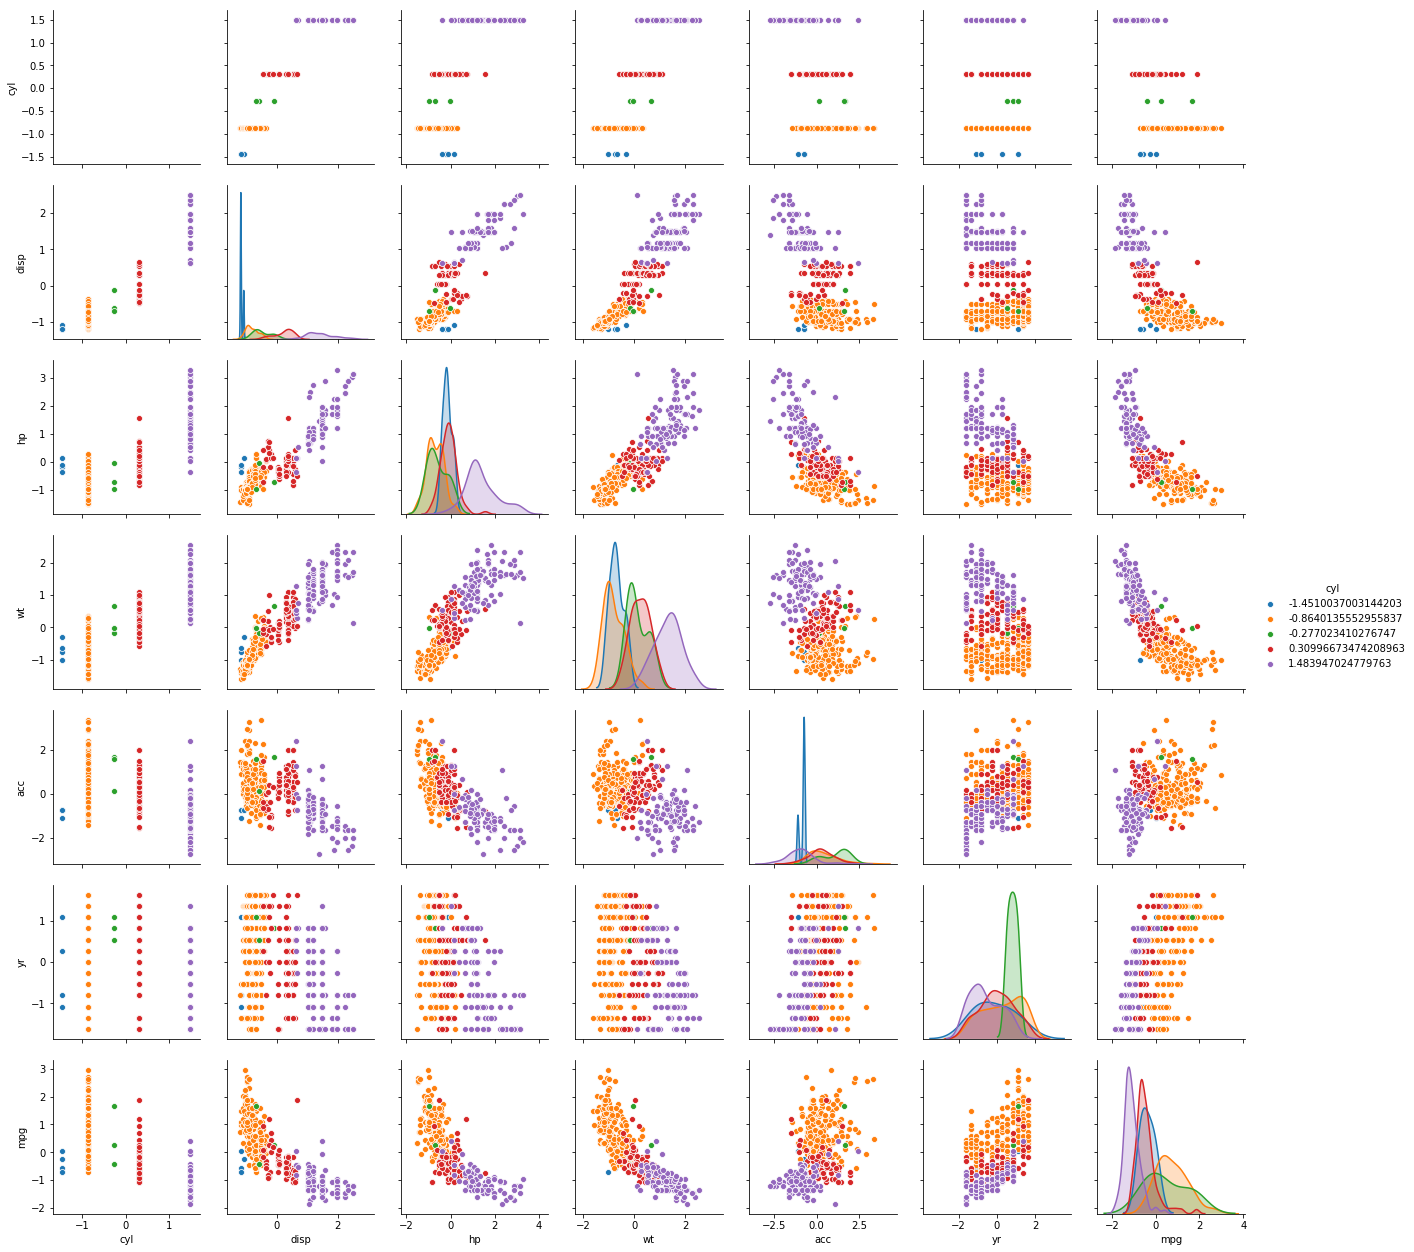

In [13]:
sb.pairplot(data,diag_kind='kde',hue='cyl')

In [ ]:
# Question 3

In [14]:
no_of_clusters = range(2,11)
cluster_error = []
for each_cluster in no_of_clusters:
    clusters = KMeans(each_cluster,n_init=5)
    clusters.fit(data.iloc[:,1:9])
    cluster_error.append(clusters.inertia_)

cluster_df = pd.DataFrame({"cluster_number":no_of_clusters,"cluster_error":cluster_error})
cluster_df 

,cluster_number,cluster_error
0,2,1272.900760
1,3,928.617487
2,4,725.327184
3,5,654.625777
4,6,587.610742
5,7,537.657205
6,8,491.124052
7,9,450.139617
8,10,418.059127


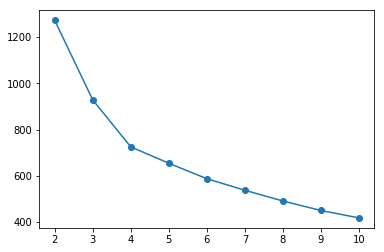

In [15]:
plt.plot( cluster_df.cluster_number, cluster_df.cluster_error, marker = "o" )

In [ ]:
# From the elbow plot it can be observed that number of clusters are 4

In [16]:
cluster = KMeans(4,n_init=5)
cluster.fit(data.iloc[:,1:9])
cluster_centers = cluster.cluster_centers_
cluster_centers

array([[ 0.41549305,  0.30031222, -0.03530064,  0.34141577,  0.30633818,
         0.06662814, -0.49265912],
       [ 1.48394702,  1.48913886,  1.50679413,  1.39145217, -1.0759934 ,
        -0.68265368, -1.1566489 ],
       [-0.85814365, -0.80247472, -0.55744679, -0.75309477,  0.3207127 ,
        -0.63048922,  0.2066802 ],
       [-0.83170217, -0.79320521, -0.75919461, -0.78782597,  0.38355974,
         1.1127382 ,  1.21012512]])

<BarContainer object of 4 artists>

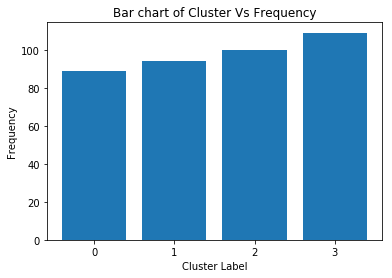

In [17]:
label_array=np.unique(cluster.labels_, return_counts=True)
plt.title("Bar chart of Cluster Vs Frequency")
plt.xticks(label_array[0])
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.bar(x=label_array[0],height=label_array[1])

In [18]:
cluster_df = pd.DataFrame(cluster_centers,columns=data.iloc[:,1:9].columns)
cluster_df.insert(column="Cluster_label",value=np.unique(cluster.labels_),loc=7)
cluster_df

,cyl,disp,hp,wt,acc,yr,mpg,Cluster_label
0,0.415493,0.300312,-0.035301,0.341416,0.306338,0.066628,-0.492659,0
1,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-1.156649,1
2,-0.858144,-0.802475,-0.557447,-0.753095,0.320713,-0.630489,0.206680,2
3,-0.831702,-0.793205,-0.759195,-0.787826,0.383560,1.112738,1.210125,3


In [ ]:
# Now 4 clusters have been found each with a centroid and label. Labels can be added to original dataset so that different clusters can be seperated based on their labels.

In [19]:
data.insert(column="cluster_label",value=cluster.labels_,loc=8)
data.sample(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg,cluster_label
65,ford galaxie 500,1.483947,1.498300,1.262436,1.357292,-0.922327,-1.081695,-1.211785,1
197,vw rabbit,-0.864014,-0.999058,-0.896659,-1.226643,-0.486809,0.005547,0.712514,2
360,volvo diesel,0.309967,-0.472795,-0.740580,0.215032,1.473019,1.364599,0.930602,3
187,chevrolet chevelle malibu classic,1.483947,1.058153,0.924265,1.458669,-0.922327,0.005547,-0.762782,1
215,dodge d100,1.483947,1.182542,1.184397,0.916420,-0.559396,0.005547,-1.340071,1
312,datsun 310,-0.864014,-1.037332,-1.026725,-1.129982,0.311639,1.092789,1.764465,3
122,saab 99le,-0.864014,-0.702437,0.143869,-0.374369,-0.559396,-0.809884,0.071081,2
355,honda prelude,-0.864014,-0.836395,-0.766593,-0.904830,-0.414223,1.364599,1.315461,3
201,pontiac ventura sj,0.309967,0.531890,0.143869,0.786752,0.239053,0.005547,-0.634495,0
351,ford escort 4w,-0.864014,-0.922511,-1.026725,-1.099333,0.239053,1.364599,1.405262,3


In [ ]:
# Question 4

In [20]:
#linear regression models
for each_label in label_array[0]:
    cluster_data = data[data['cluster_label']==each_label]
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X=cluster_data.iloc[:,2:8],y=cluster_data.iloc[:,1])
    print('coefficients for cluster label = {}'.format(each_label))
    print(linear_reg_model.coef_)
    print("")

coefficients for cluster label = 0
[ 0.6205502   0.24851219  0.00314161 -0.00243721  0.05324632  0.17447276]

coefficients for cluster label = 1
[-6.79400076e-30 -7.83486743e-32  2.40156856e-30 -4.59014599e-30
  2.05741806e-30 -7.62275209e-30]

coefficients for cluster label = 2
[ 0.76472602 -0.06221818 -0.07268147  0.0149644  -0.0725138   0.12421824]

coefficients for cluster label = 3
[ 0.55550301 -0.00743037  0.03176004  0.00526428 -0.07129105  0.14340712]

